In [69]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Load Edgelist
edgelist_path = './congress_network/congress.edgelist'
G = nx.read_edgelist(edgelist_path)
G_directed = nx.read_edgelist(edgelist_path, create_using=nx.DiGraph())

In [71]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Edges:", list(G.edges()))

Number of nodes: 475
Number of edges: 10222
Edges: [('0', '4'), ('0', '12'), ('0', '18'), ('0', '25'), ('0', '30'), ('0', '46'), ('0', '55'), ('0', '58'), ('0', '59'), ('0', '74'), ('0', '76'), ('0', '77'), ('0', '85'), ('0', '86'), ('0', '87'), ('0', '154'), ('0', '168'), ('0', '341'), ('0', '374'), ('0', '401'), ('0', '11'), ('0', '9'), ('0', '38'), ('0', '50'), ('0', '27'), ('0', '315'), ('0', '29'), ('0', '13'), ('0', '33'), ('0', '57'), ('0', '71'), ('0', '45'), ('0', '202'), ('4', '3'), ('4', '12'), ('4', '14'), ('4', '17'), ('4', '24'), ('4', '25'), ('4', '27'), ('4', '30'), ('4', '46'), ('4', '55'), ('4', '58'), ('4', '59'), ('4', '64'), ('4', '79'), ('4', '84'), ('4', '88'), ('4', '89'), ('4', '149'), ('4', '154'), ('4', '168'), ('4', '179'), ('4', '197'), ('4', '213'), ('4', '224'), ('4', '243'), ('4', '250'), ('4', '268'), ('4', '286'), ('4', '293'), ('4', '315'), ('4', '374'), ('4', '401'), ('4', '447'), ('4', '460'), ('4', '77'), ('4', '86'), ('4', '87'), ('4', '37'), ('4'

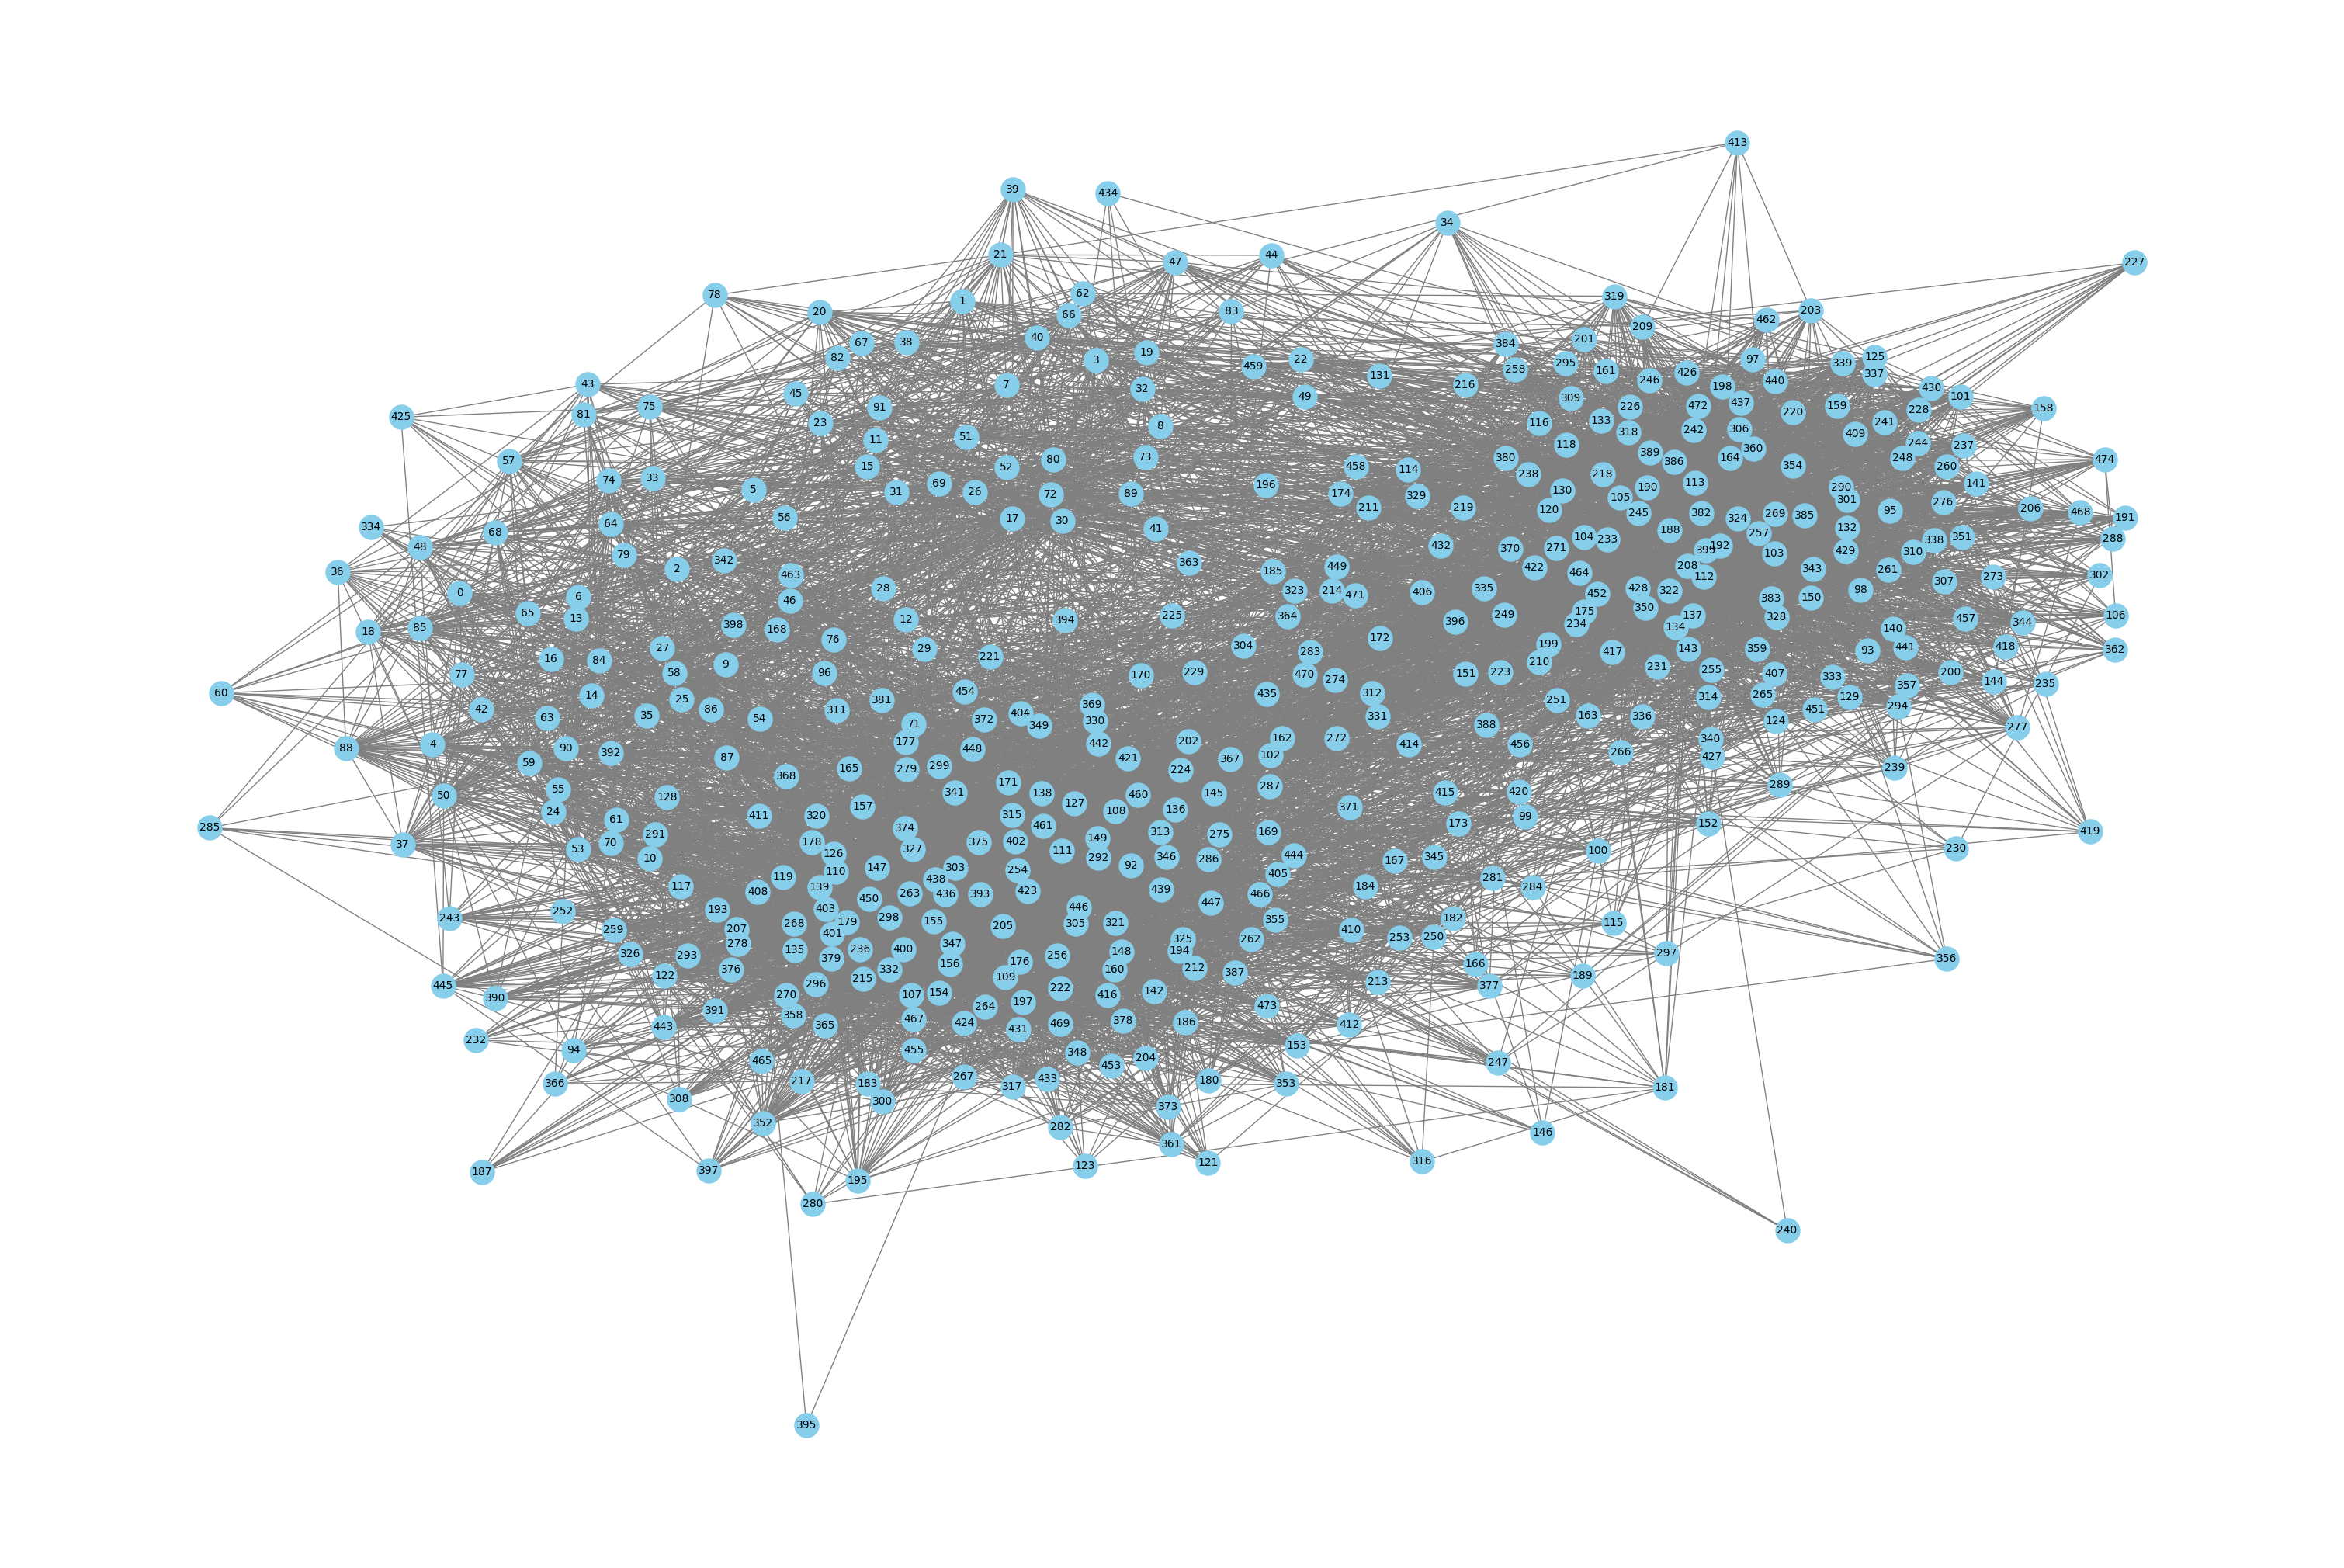

In [72]:
# Draw the Graph (Undirected)
plt.figure(figsize=(30, 20))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.show()

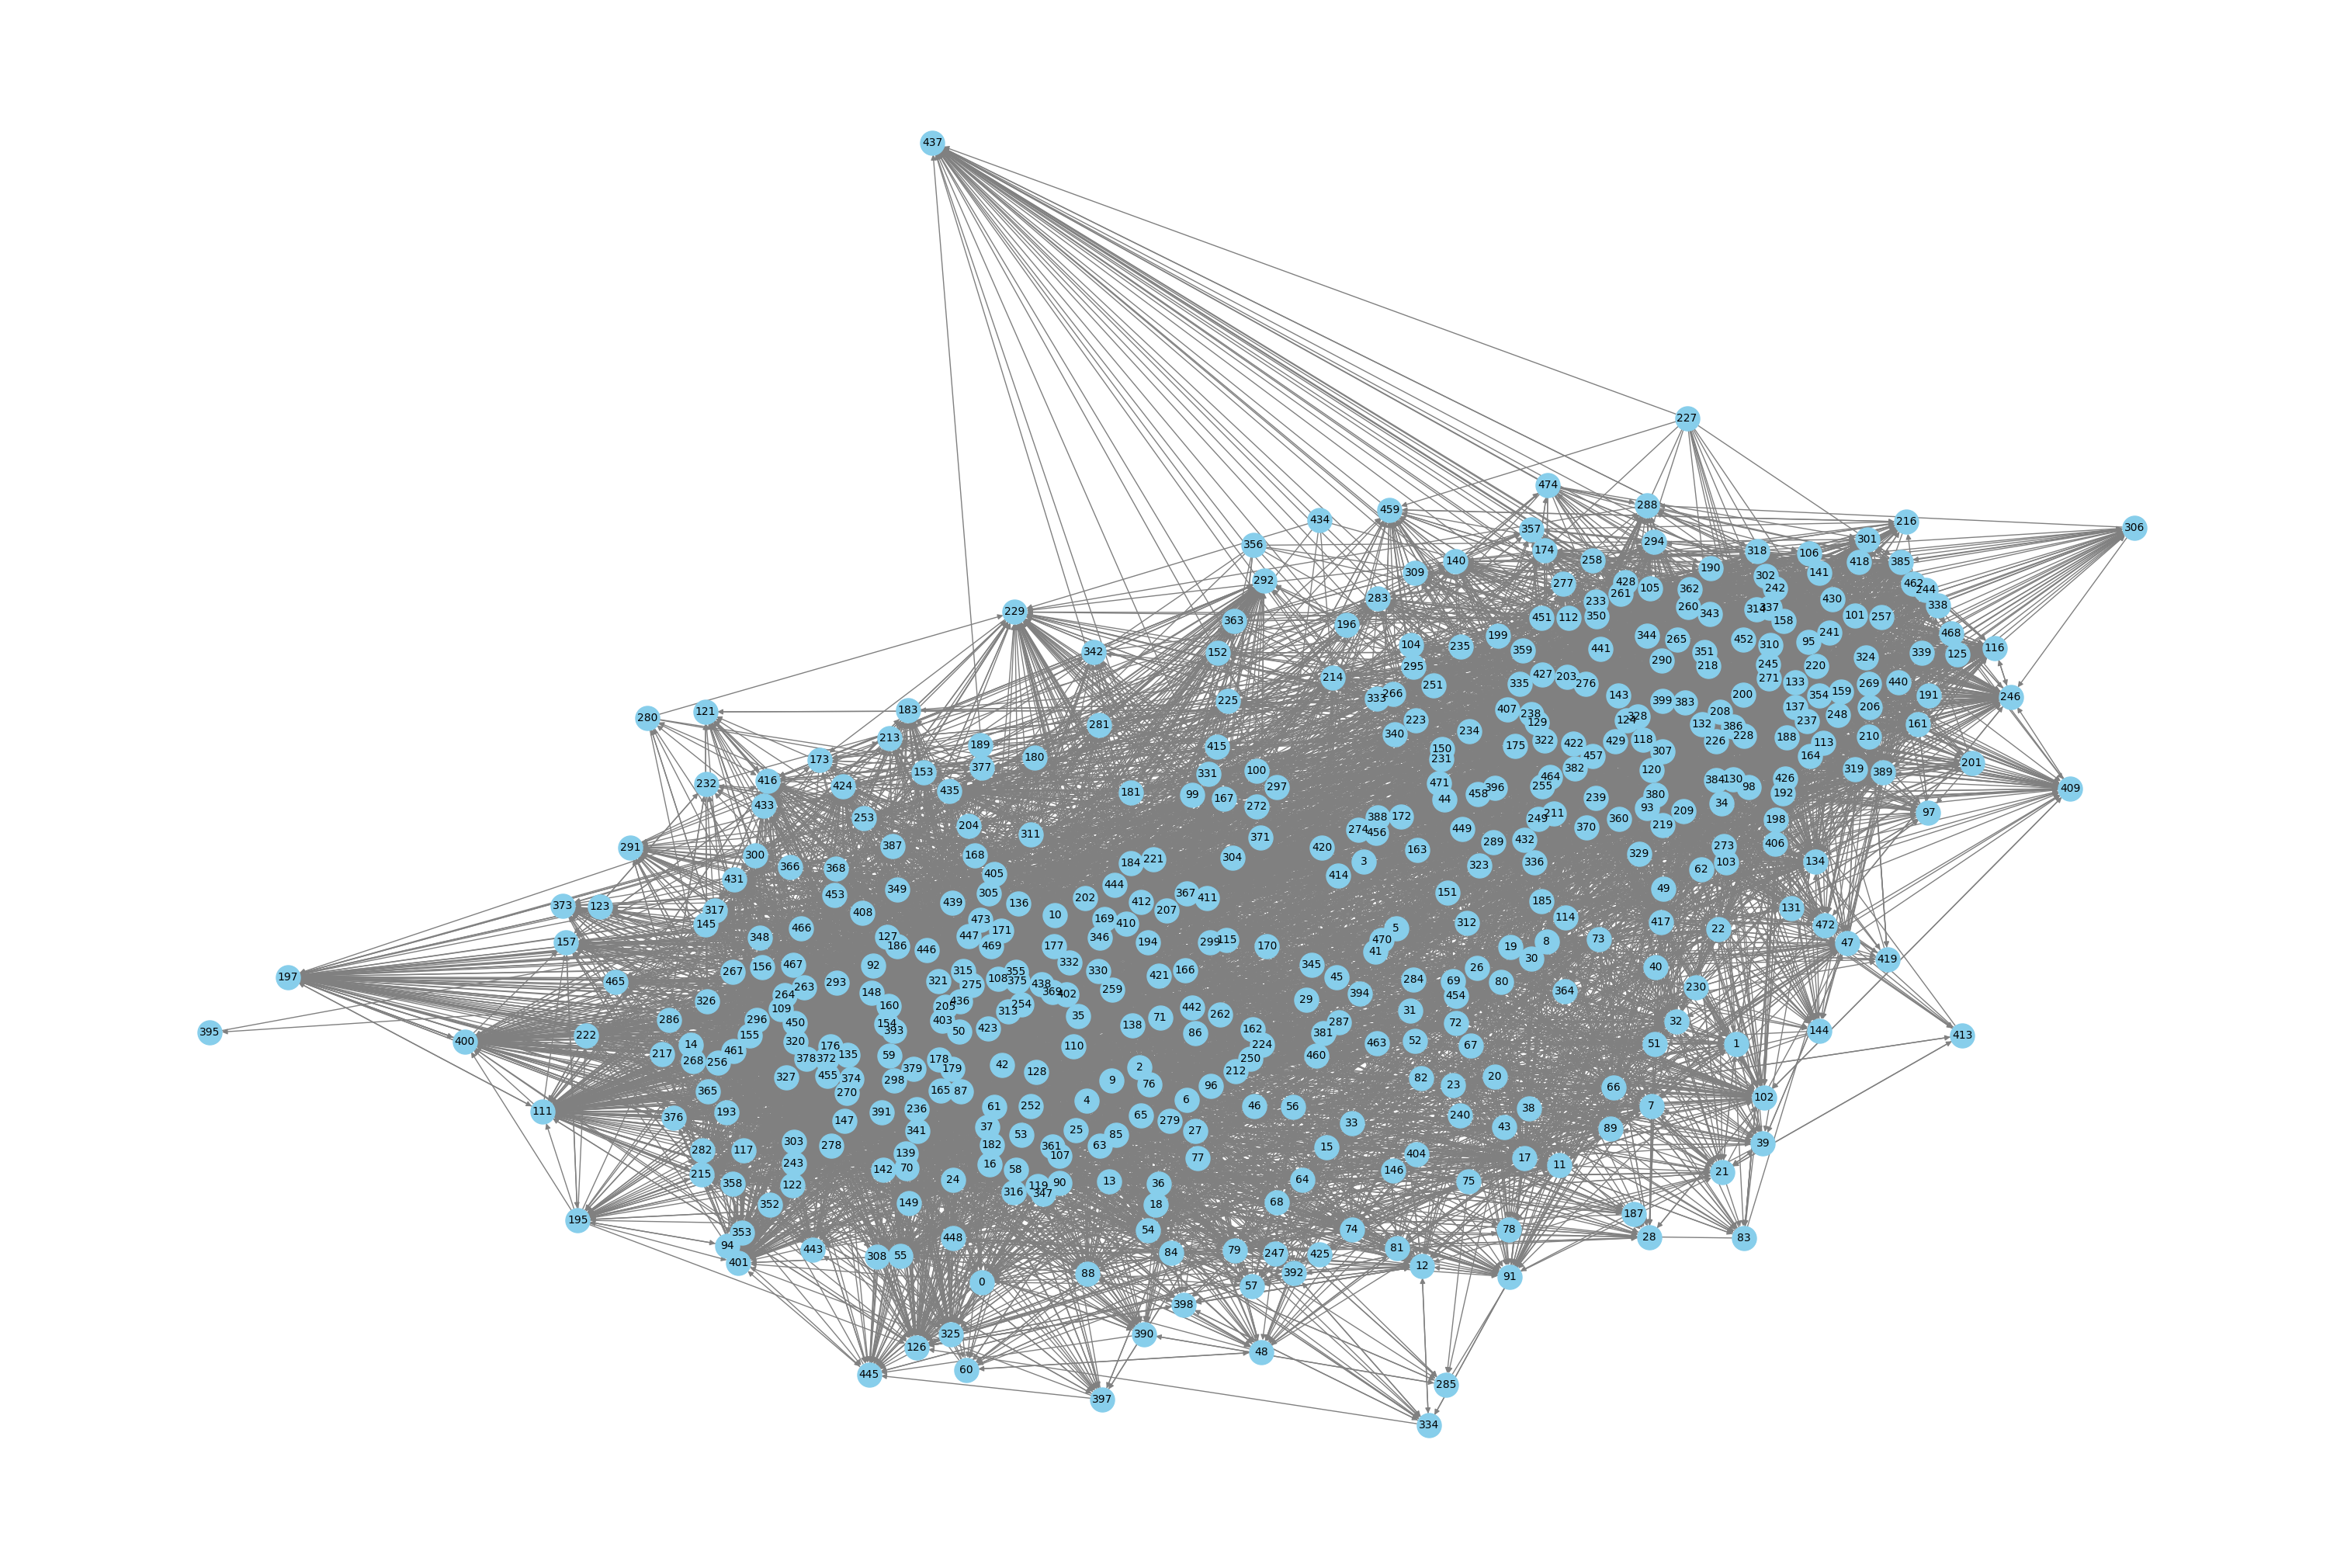

In [73]:
# Draw the Graph (Directed)
plt.figure(figsize=(30, 20))
nx.draw(G_directed, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.show()

# 1. Perhitungan Centrality

## a. Degree Centrality

(array([ 87., 204., 114.,  42.,  18.,   6.,   2.,   0.,   1.,   1.]),
 array([  2. ,  23.2,  44.4,  65.6,  86.8, 108. , 129.2, 150.4, 171.6,
        192.8, 214. ]),
 <BarContainer object of 10 artists>)

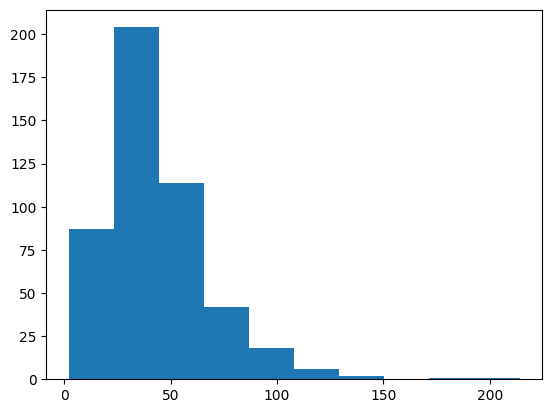

In [74]:
degrees = [ G.degree(n) for n in G.nodes() ]
plt.hist(degrees)

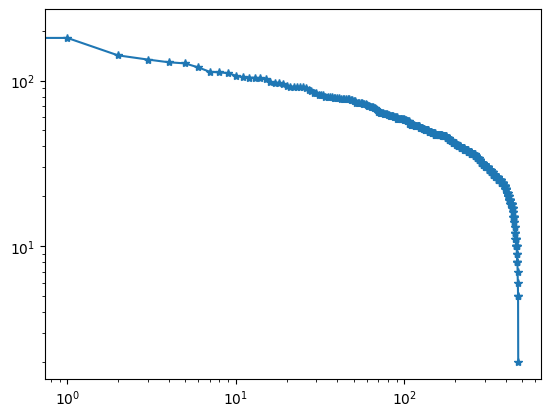

In [75]:
degree_sequence = sorted([ d for n, d in G.degree() ], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [76]:
# Mencari node-node paling berpengaruh menggunakan Degree Centralitiy (Weighted)
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())
degree_centrality_weighted = {node: deg / max_degree for node, deg in dict(degree).items()}
sorted_degree_centrality_weighted = dict(sorted(degree_centrality_weighted.items(), key=lambda item: item[1], reverse=True))
sorted_degree_centrality_weighted

{'322': 1.0,
 '399': 0.5597756237168389,
 '208': 0.5462069165127988,
 '269': 0.5136014234409492,
 '367': 0.5073571433195347,
 '393': 0.4813855503664942,
 '389': 0.4657317393083942,
 '335': 0.42582014710362975,
 '192': 0.423159175993481,
 '113': 0.39057560201481967,
 '436': 0.3813048481838678,
 '470': 0.3791631455394011,
 '92': 0.3727222988942607,
 '190': 0.3673942300491669,
 '147': 0.3579412291598113,
 '164': 0.3579301794117725,
 '215': 0.35727240881797184,
 '385': 0.35507490378206674,
 '111': 0.35086410384493083,
 '254': 0.34459963841587443,
 '303': 0.34345234975541444,
 '461': 0.33844492817672367,
 '220': 0.3317285569382264,
 '401': 0.3298982681330277,
 '188': 0.32564969587123216,
 '132': 0.3214273428381287,
 '452': 0.32127911015454125,
 '72': 0.3198896270747365,
 '197': 0.3117188901181215,
 '246': 0.3007575628714216,
 '155': 0.2966785648661443,
 '321': 0.29653756436295603,
 '354': 0.2964142502652254,
 '137': 0.2908353778139739,
 '318': 0.2903272284550225,
 '134': 0.28783530421154485

## b. Closeness Centrality

In [77]:
# Menampilkan node-node yang paling berpengaruh berdasarkan Closeness Centrality (Weighted)
closeness_centrality = nx.closeness_centrality(G, distance='weight')
sorted_closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness_centrality

{'17': 353.86627048979824,
 '111': 346.7605028078458,
 '147': 341.4761156777393,
 '389': 330.07699866619964,
 '126': 328.2504148960908,
 '149': 324.5627889425061,
 '32': 322.2906428629214,
 '428': 322.1482601899594,
 '193': 320.1423452377303,
 '3': 318.5599054568886,
 '54': 316.77225332007845,
 '331': 314.5216994925136,
 '66': 313.14888292894506,
 '58': 312.6270339692658,
 '157': 312.3596598220326,
 '409': 310.573302691169,
 '1': 310.17886317382266,
 '257': 310.143259637793,
 '22': 309.94968319034984,
 '367': 307.72656574464423,
 '370': 307.71757770970265,
 '461': 306.40396914560046,
 '113': 306.0957521910202,
 '18': 305.9434108951893,
 '102': 305.6501241740584,
 '132': 305.4321172045465,
 '342': 305.0266399334183,
 '242': 304.49094620430634,
 '88': 303.52370370326213,
 '345': 302.9067255325206,
 '48': 302.3554868323064,
 '336': 302.07682281997097,
 '303': 301.8449718074806,
 '473': 301.1509844700368,
 '152': 300.7264184562153,
 '215': 300.39793781493375,
 '233': 299.5036309964138,
 '2

## c. Betweenness Centrality

In [78]:
# Menampilkan node-node yang paling berpengaruh berdasarkan Betweeness Centrality (Weigthed)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
sorted_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_betweenness_centrality

{'17': 0.11002652370035354,
 '367': 0.09782725696767497,
 '428': 0.07870462303439497,
 '111': 0.06820341451633767,
 '147': 0.06693666128461537,
 '149': 0.06578145303491201,
 '32': 0.050001731007029815,
 '322': 0.04399328203219337,
 '389': 0.04310099433391613,
 '3': 0.040268745744165224,
 '54': 0.03766400495131728,
 '105': 0.03681977264550122,
 '71': 0.036632144227080936,
 '22': 0.03489189808000522,
 '102': 0.03227595353000121,
 '88': 0.030751286786023315,
 '439': 0.030682450052482418,
 '58': 0.029269162460213372,
 '271': 0.026679809576483107,
 '113': 0.02585466082669497,
 '303': 0.023117694460055356,
 '461': 0.022537148685220516,
 '126': 0.02081893427934052,
 '26': 0.02073353493724409,
 '315': 0.020426753764993383,
 '72': 0.020151470548880026,
 '263': 0.01906836989262659,
 '383': 0.01773995474319289,
 '87': 0.017245481434471716,
 '254': 0.016873771569090965,
 '182': 0.015985584428328023,
 '215': 0.01589637915808066,
 '435': 0.014912891053603446,
 '59': 0.014902037745723342,
 '137': 0.0

## d. Eigenvector Centrality

In [79]:
# Menampilkan node-node paling berpengaruh berdasarkan Eigenvector Centrality (Weighted)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
sorted_eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_eigenvector_centrality


{'322': 0.29858905213250647,
 '399': 0.19133243265262614,
 '389': 0.18065923579436932,
 '269': 0.17283399538774416,
 '208': 0.16360968213980664,
 '164': 0.15704666507661738,
 '113': 0.1517578489700071,
 '159': 0.13922009181168468,
 '220': 0.13799902051523832,
 '246': 0.13314169924998295,
 '129': 0.12130306524483349,
 '452': 0.12025145874483831,
 '192': 0.11798260603634611,
 '354': 0.1175761461038939,
 '335': 0.11583608715934347,
 '132': 0.11362628547784667,
 '188': 0.11242965954241728,
 '440': 0.11124198794610814,
 '118': 0.10982602143361747,
 '226': 0.1088204508369646,
 '245': 0.10863674993797795,
 '190': 0.10717142699588528,
 '385': 0.09964782389415766,
 '386': 0.09810431683626107,
 '271': 0.09705189055370886,
 '318': 0.09644496837742403,
 '432': 0.09397822509774396,
 '428': 0.09351092043852124,
 '248': 0.09287085197677095,
 '337': 0.0928164881056267,
 '161': 0.09212210924883485,
 '370': 0.09200704230242078,
 '324': 0.0902980258406588,
 '409': 0.0896941698446566,
 '137': 0.0889276899

## e. Katz Centrality

In [80]:
# Menampilkan node-node yang paling berpengaruh berdasarkan Katz Centrality (Weighted)
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0, weight='weight')
sorted_katz_centrality = dict(sorted(katz_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_katz_centrality

{'322': 0.052647069193750826,
 '399': 0.04918510892684263,
 '208': 0.04905812238903295,
 '269': 0.048802134057665314,
 '367': 0.048741372021189146,
 '393': 0.048531734368605,
 '389': 0.048438678800042406,
 '335': 0.0481050874116075,
 '192': 0.048074177201474264,
 '113': 0.047837712777674894,
 '436': 0.04773437536939256,
 '470': 0.047727559940199796,
 '92': 0.047672410362856285,
 '190': 0.047634193342688175,
 '164': 0.04759195275327459,
 '215': 0.04755268278013317,
 '147': 0.04754711740755468,
 '385': 0.04752634716198976,
 '111': 0.04749962828759466,
 '254': 0.047443612809706055,
 '303': 0.04743378103304034,
 '461': 0.04740737949279796,
 '220': 0.04737723904562028,
 '401': 0.047340153778818665,
 '188': 0.04731420229505597,
 '452': 0.047298539978977816,
 '132': 0.047282734583555634,
 '72': 0.04723663495838554,
 '197': 0.04718382846446182,
 '246': 0.04713173868420653,
 '354': 0.04709294333141899,
 '155': 0.04707250217300291,
 '321': 0.047059933844978155,
 '137': 0.047032189534429156,
 '31

## f. PageRank Centrality

In [ ]:
# Menampilkan node-node yang paling berpengaruh berdasarkan PageRank (Weighted)
# Standar Faktor Damping = 0.85
pagerank = nx.pagerank(G, alpha=0.85, weight='weight') 
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
sorted_pagerank